# Customer Churn

## Introduction:

Customer churn is the percentage of customers who stopped using a company's products or services during a specified time period.

Measuring customer churn is important for several reasons:
- **Revenue Impact:** High customer churn means loss of recurring revenue.
    
- **Customer Insights:** Understanding why customers leave can provide valuable insights into product or service shortcomings, and areas needing improvement.
    
- **Cost Efficiency:** Acquiring new customers is often more expensive than retaining existing customers.

## Data Import and Cleaning:

### Importing the Libraries:

In [1]:
# To import the libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import plotly.express as px
from matplotlib.ticker import FuncFormatter
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score 
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
pd.set_option('display.max_columns', None)

### Loading the Data:

In [2]:
# To load the data and to save it as a DataFrame:
df = pd.read_csv("Telco-Customer-Churn.csv")

### Viewing the Data:

In [3]:
# To view the first rows of the DataFrame:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Viewing the Structure of the Data:

In [4]:
# To view the structure of the DataFrame:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


The data contains numeric and categorical features. The target variable is Churn.

In [5]:
# To convert the categorical target variable to a numeric target variable:
# Map the Churn column values from No to 0 and Yes to 1
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})
# Display the unique values in the Churn column
unique_values = df['Churn'].unique()
print(f"The unique values in the 'Churn' column are: {unique_values}")
print()
# To check the data type of the column:
data_type = df['Churn'].dtype
print(f"The data type of the 'Churn' column is: {data_type}")

The unique values in the 'Churn' column are: [0 1]

The data type of the 'Churn' column is: int64


In [6]:
# To convert the TotalCharges column from categorical to numeric:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

### Checking if there are Duplicate Rows:

In [7]:
# To check for duplicate rows:
duplicates = df.duplicated()

# Check if there are duplicate rows and print Yes or No
if duplicates.sum() > 0:
    print("Are there any duplicate rows: Yes")
else:
    print("Are there any duplicate rows: No")
print()
# Count the total number of duplicate rows
total_duplicates = duplicates.sum()

# Print the result
print("Total number of duplicate rows:", total_duplicates)


Are there any duplicate rows: No

Total number of duplicate rows: 0


### Checking for Missing Values:

In [8]:
# To check for missing values: 
missing = pd.DataFrame({'Missing Values' : df.isna().sum(), 
                     'Missing Value %' : (df.isna().sum()) / (df.shape[0]) * (100)})
missing

,Missing Values,Missing Value %
customerID,0,0.000000
gender,0,0.000000
SeniorCitizen,0,0.000000
Partner,0,0.000000
Dependents,0,0.000000
tenure,0,0.000000
PhoneService,0,0.000000
MultipleLines,0,0.000000
InternetService,0,0.000000
OnlineSecurity,0,0.000000


There were 11 missing values in the Total Charges column. Missing values in a numeric column can be imputed with the mean or the median.
Imputing missing values with the mean can be used when the column does not have extreme outliers, as the mean can be significantly affected by those.
If there are outliers, imputing missing values with the median is useful because the median is less sensitive to outliers than the mean.

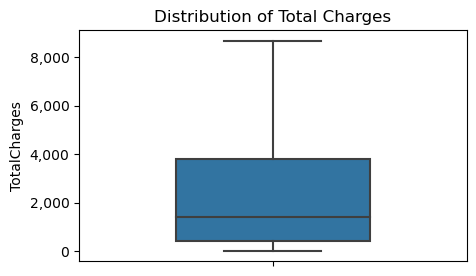

In [9]:
# To use a Box Plot to check if the TotalCharges column has outliers:
plt.figure(figsize=(5, 3))
sns.boxplot(y=df['TotalCharges'], width=0.5)  # Adjust the width as needed
# Add a title
plt.title('Distribution of Total Charges', fontsize=12)
# Format the y-axis with commas using a lambda function
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))
# Show the plot
plt.show()

The Total Charges column did not contain outliers, as outliers are represented as individual points beyond the ends of the Box Plot whiskers.
Since no outliers were found, the mean will be used to impute the missing values in the Total Charges column.

In [10]:
# To replace missing values in a column with the mean of the column:
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())

In [11]:
# To check for missing values again: 
missing = pd.DataFrame({'Missing Values' : df.isna().sum(), 
                     'Missing Value %' : (df.isna().sum()) / (df.shape[0]) * (100)})
missing

,Missing Values,Missing Value %
customerID,0,0.0
gender,0,0.0
SeniorCitizen,0,0.0
Partner,0,0.0
Dependents,0,0.0
tenure,0,0.0
PhoneService,0,0.0
MultipleLines,0,0.0
InternetService,0,0.0
OnlineSecurity,0,0.0


The missing values in the Total Charges column were replaced.

## Exploratory Data Analysis:

### Viewing Summary Statistics of Numeric Columns:

In [12]:
# To view summary statistics:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.000,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.000,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.500,70.35,89.85,118.75
TotalCharges,7043.0,2283.300441,2265.000258,18.80,402.225,1400.55,3786.60,8684.80
Churn,7043.0,0.265370,0.441561,0.00,0.000,0.00,1.00,1.00


### Viewing the Unique Values of each Categorical Column:

In [13]:
# To view the unique values of each categorical column:
for col in df.describe(include='object').columns:
    print(col)
    print(df[col].unique())
    print('-'*70)

customerID
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
----------------------------------------------------------------------
gender
['Female' 'Male']
----------------------------------------------------------------------
Partner
['Yes' 'No']
----------------------------------------------------------------------
Dependents
['No' 'Yes']
----------------------------------------------------------------------
PhoneService
['No' 'Yes']
----------------------------------------------------------------------
MultipleLines
['No phone service' 'No' 'Yes']
----------------------------------------------------------------------
InternetService
['DSL' 'Fiber optic' 'No']
----------------------------------------------------------------------
OnlineSecurity
['No' 'Yes' 'No internet service']
----------------------------------------------------------------------
OnlineBackup
['Yes' 'No' 'No internet service']
-----------------------------------------------------

### Visualizing Churn Status:

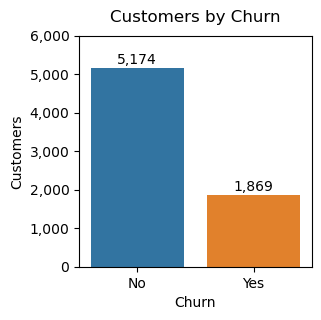

In [14]:
# A Bar Chart of counts of the target variable:
# Create a DataFrame called temp_df and map 0 to No and 1 to Yes in the Churn column
temp_df = df.copy()
temp_df['Churn'] = temp_df['Churn'].map({0: 'No', 1: 'Yes'})
fig, ax = plt.subplots(figsize=(3, 3))
# Create the count plot using seaborn
sns.countplot(data=temp_df, x='Churn', ax=ax)
# Loop through the bars to add labels with comma formatting
for bar in ax.patches:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2, 
        height + 20,  # Adjust the value to position the label higher
        f'{height:,.0f}', 
        ha='center', 
        va='bottom', 
        fontsize=10 
    )
# Set the title with font size and bold font weight
ax.set_title("Customers by Churn", fontsize=12, pad=10)
# Label the x-axis and y-axis
ax.set_xlabel("Churn")
ax.set_ylabel("Customers")
# Format the y-axis labels
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:,.0f}'))
# Set y-axis limits from 0 to 6,000 
ax.set_ylim(0, 6000)
# Display the plot
plt.show()

Out of the total customer base, **5,174** customers did not churn, while **1,869** customers have churned. This indicates that approximately **26.5%** of the customers have left, meaning a significant portion of the customers are loyal, but there is still a notable number of customers leaving.

### Viewing Summary Statistics of a Numeric Column grouped by the Target Variable:

In [15]:
# To group by the target variable and get descriptive statistics:
# Create a temporary dataframe
temp_df = df.copy()
# Map 0 to No and 1 to Yes in the Churn column
temp_df['Churn'] = temp_df['Churn'].map({0: 'No', 1: 'Yes'})
# Group by the target variable and get descriptive statistics for 'tenure'
grouped_stats = temp_df.groupby('Churn')['tenure'].describe()
# Display the result
print()
print("Tenure grouped by Churn Status:")
grouped_stats


Tenure grouped by Churn Status:


,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
No,5174.0,37.569965,24.113777,0.0,15.0,38.0,61.0,72.0
Yes,1869.0,17.979133,19.531123,1.0,2.0,10.0,29.0,72.0


Customers who did not churn have an average tenure of approximately **37.57** months, while those who churned have an average tenure of about **17.98** months. This substantial difference suggests that longer-tenured customers are more **likely** to stay.

### Correlations with the Target Variable:

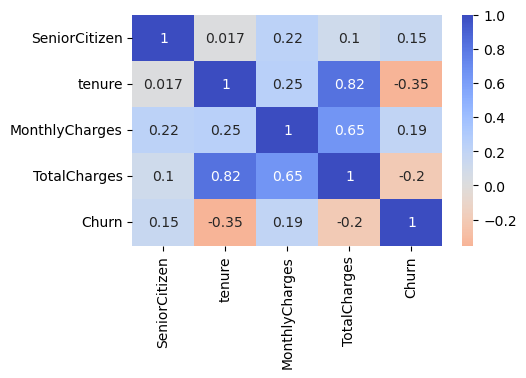

In [16]:
# To create a Correlation Matrix:
# Select only numeric columns from the DataFrame
numeric_cols = df.select_dtypes(include='number').columns
# Create a figure and axis for the heatmap
fig, ax = plt.subplots(figsize=(5, 3))
# Plot the heatmap with reversed colors and center set to zero
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm_r', center=0, ax=ax)
# Display the heatmap
plt.show()

**Insights:**
- There is a positive correlation of 0.15 between being a Senior Citizen and Churn. This indicates that senior citizens are slightly more likely to churn compared to non-senior customers, although the relationship is not very strong.
- There is a negative correlation of -0.35 between Tenure and Churn. This means that customers with longer tenures are less likely to churn. The longer a customer stays with the company, the more likely they are to remain loyal.
- There is a positive correlation of 0.19 between Monthly Charges and Churn. This suggests that customers with higher monthly charges are somewhat more likely to churn. It may indicate that higher costs could be a factor driving customers away.
- There is a negative correlation of -0.2 between Total Charges and Churn. This means that customers who have accumulated higher total charges are less likely to churn. This could indicate that these customers see value in the services they’ve used over time.

### Viewing a List of the Columns:

In [17]:
# To list all the numeric columns:
numeric_columns = df.select_dtypes(include=['number']).columns.tolist()
print("Numeric columns:")
print()
print(numeric_columns)

Numeric columns:

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']


In [18]:
# To list all the categorical columns:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
print("Categorical columns:")
print()
print(categorical_columns)

Categorical columns:

['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


### Visualizing Customer Churn by Gender:

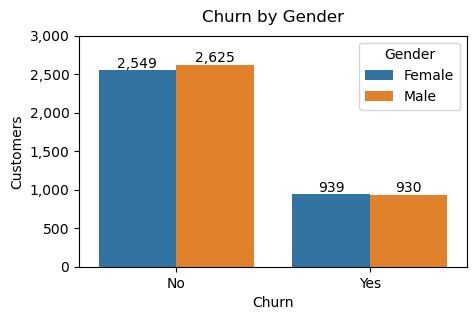

In [19]:
# A side-by-side Bar Chart of the count of the target variable grouped by a categorical variable:
# Temporarily map the Churn column values from 0 to No and 1 to Yes for the plot
temp_df = df.replace({'Churn': {0: 'No', 1: 'Yes'}})
fig, ax = plt.subplots(figsize=(5, 3))
# Create the count plot using seaborn
sns.countplot(data = temp_df, x='Churn', hue='gender', ax=ax)
# Set the title
ax.set_title("Churn by Gender", fontsize=12, pad=10)
# Label the x-axis and y-axis
ax.set_xlabel("Churn")
ax.set_ylabel("Customers")
# Format the y-axis labels with comma and 0 decimal places
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:,.0f}'))
# Loop through the bars to add labels with comma formatting and 0 decimal places
for container in ax.containers:
    ax.bar_label(container, fmt='{:,.0f}', label_type='edge')
# Set the legend title and location
ax.legend(title="Gender", loc='best')
# Set y-axis limits from 0 to 3,000 
ax.set_ylim(0, 3000)
# Display the plot
plt.show()

**Overall Churn:**
- The total number of customers who have not churned (5,174) is significantly higher than those who have churned (1,869). This indicates a relatively high retention rate.

**Gender Distribution in Churn:**
- Among those who have not churned, there are slightly more male customers (2,625) compared to female customers (2,549).
- Among those who have churned, the numbers for females (939) and males (930) are almost equal.

**Gender-wise Churn Rate:**
- For Females: 939 out of 3,488 total female customers have churned. This gives a churn rate of approximately 27%.
- For Males: 930 out of 3,555 total male customers have churned. This gives a churn rate of approximately 26%.
    
**Key Takeaways:**

- The overall retention rate is strong, but there is still a notable percentage of customers who are churning.

- Both male and female customers are churning at similar rates, with a very slight difference favoring male retention.

- While the number of male and female customers is almost balanced, any strategies to further reduce churn could consider targeted approaches for each gender.

### Visualizing Customer Churn by Senior Citizen Status:

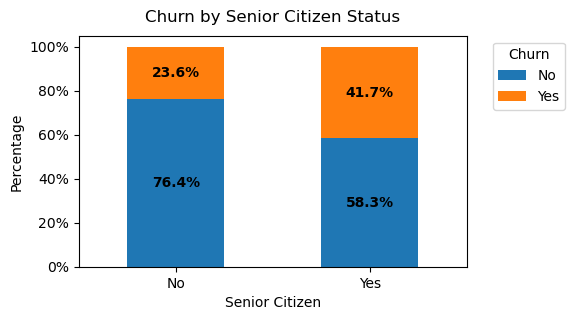

In [20]:
# A stacked Bar Chart of the count of a categorical variable grouped by the target variable:
# Temporarily map the Churn column values from 0 to No and 1 to Yes for the plot
temp_df = df.replace({'Churn': {0: 'No', 1: 'Yes'}, 'SeniorCitizen': {0: 'No', 1: 'Yes'}})
# Calculate the total counts and normalize to percentage
total_counts = temp_df.groupby('SeniorCitizen')['Churn'].value_counts(normalize=True).unstack() * 100
fig, ax = plt.subplots(figsize=(5, 3))
# Plot the bars
total_counts.plot(kind='bar', stacked=True, ax=ax, color=['#1f77b4', '#ff7f0e'])
# Add percentage labels on the bars with comma and one decimal place
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2, y + height / 2, f'{height:,.1f}%', ha='center', va='center', 
            fontsize=10, fontweight='bold')
# Set the title
ax.set_title('Churn by Senior Citizen Status', fontsize=12, pad=10)
# Label the x-axis and y-axis
ax.set_xlabel('Senior Citizen')
plt.xticks(rotation=0)
ax.set_ylabel('Percentage')
# Format the y-axis labels with comma and percent sign
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:,.0f}%'))
# Set the legend title and location
ax.legend(title='Churn', bbox_to_anchor=(1.05, 1), loc='upper left')
# Display the plot
plt.show()

**Non-Senior Citizens:**

- 76.4% No Churn: The majority of non-senior citizen customers do not churn, indicating a higher level of satisfaction or retention among this group.

- 23.6% Churn: A smaller portion of non-senior citizens churn, suggesting that there may still be some concerns or issues leading to churn in this group.

**Senior Citizens:**

- 58.3% No Churn: A little more than half of the senior citizen customers do not churn. This is a lower retention rate compared to non-senior citizens.

- 41.7% Churn: A significant portion of senior citizens churn, indicating that this group has higher dissatisfaction or retention challenges.


**Recommendations:**

- The company can consider conducting detailed surveys or focus groups with senior citizen customers to understand their specific pain points and preferences.

- The company can create tailored offerings or support services specifically designed to address the needs and concerns of senior citizens.


### Analyzing Churn Status with Box Plots:

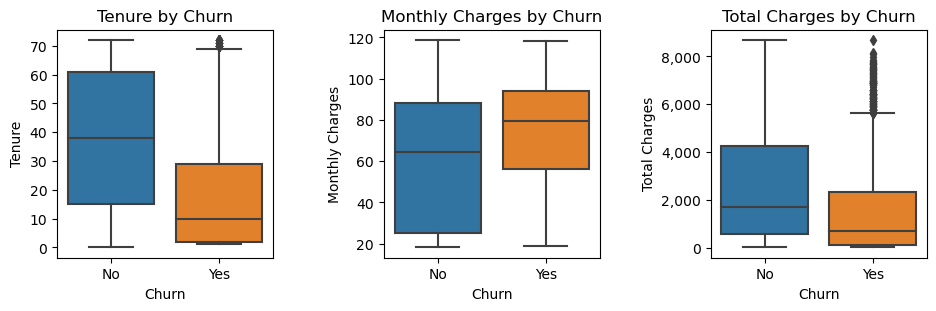

In [21]:
# To create Box Plots to compare numeric variables against the target variable:
# Create a figure with 3 subplots in one row
# Create the temp_df with the mappings
temp_df = df.copy()
temp_df['Churn'] = temp_df['Churn'].map({0: 'No', 1: 'Yes'})
fig, axes = plt.subplots(1, 3, figsize=(10, 3.75))
# y = tenure, hue = Churn
sns.boxplot(x='Churn', y='tenure', data=temp_df, ax=axes[0])
axes[0].set_title('Tenure by Churn')
axes[0].set_xlabel('Churn')
axes[0].set_ylabel('Tenure')
axes[0].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
# y = MonthlyCharges, hue = Churn
sns.boxplot(x='Churn', y='MonthlyCharges', data=temp_df, ax=axes[1])
axes[1].set_title('Monthly Charges by Churn')
axes[1].set_xlabel('Churn')
axes[1].set_ylabel('Monthly Charges')
axes[1].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
# y = TotalCharges, hue = Churn
sns.boxplot(x='Churn', y='TotalCharges', data=temp_df, ax=axes[2])
axes[2].set_title('Total Charges by Churn')
axes[2].set_xlabel('Churn')
axes[2].set_ylabel('Total Charges')
axes[2].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
# Adjust layout with added space between charts
plt.tight_layout(pad=3.0)
# Display the plots
plt.show()

**Longer Tenure Correlates with Lower Churn:**
- The higher median tenure for customers who have not churned suggests that customers who stay longer are less likely to leave.
- This indicates that once customers are engaged over a longer period, they tend to remain loyal.
- This underscores the importance of creating strong onboarding and early engagement strategies to retain new customers.

**Higher Monthly Charges Correlate with Higher Churn:**
- The higher median for customers who have churned suggests that customers with higher monthly charges are more likely to leave.
- This indicates that there may be an issue with the value perception of higher-priced services.
- A strategy the company could consider may be to offer loyalty programs and exclusive benefits to help retain these customers.

**Higher Total Charges Correlate with Lower Churn:**
- The higher median total charges for customers who have not churned suggests that customers who have been with the company longer (having accumulated higher total charges) are less likely to leave.
- Long-term customers likely perceive more value in the services provided, leading to them not churning.
- This highlights the need for strategies to engage and retain newer customers or those with lower spending.

### Visualizing the Distribution of Customers by Contract Type and Churn Status:

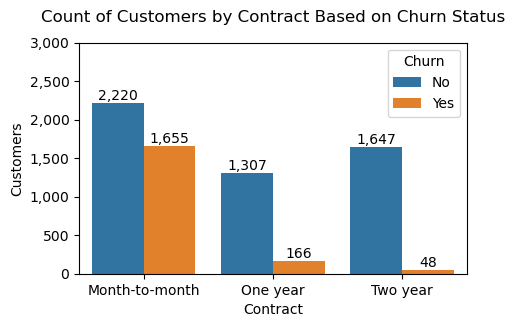

In [22]:
# To create a Bar Chart of a categorical variable grouped by the target variable:
# Create the temp_df DataFrame with mapped values
temp_df = df.copy()
temp_df['Churn'] = temp_df['Churn'].map({0: 'No', 1: 'Yes'})
fig, ax = plt.subplots(figsize=(5, 3))
sns.countplot(x='Contract', hue='Churn', data=temp_df, ax=ax)
# Add labels to the bars with commas
for container in ax.containers:
    ax.bar_label(container, fmt='{:,.0f}')
# Set the y-axis limits
ax.set_ylim(0, 3000)
# Set the title of the plot
plt.title("Count of Customers by Contract Based on Churn Status", fontsize=12, pad=15)
# Format the y-axis to include commas
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
# Label the y-axis and x-axis
ax.set_ylabel('Customers')
ax.set_xlabel('Contract')
# Display the plot
plt.show()

**Month-to-Month Contract:**
- Total customers: 3,875 (2,220 no churn + 1,655 churn)
- Churn rate: **43%** (1,655 churn out of 3,875)

**One Year Contract:**
- Total customers: 1,473 (1,307 no churn + 166 churn)
- Churn rate: **11%** (166 churn out of 1,473)
    
**Two Year Contract:**
- Total customers: 1,695 (1,647 no churn + 48 churn)
- Churn rate: **3%** (48 churn out of 1,695)

**Higher Retention for Longer Contracts:**
- The churn rate is significantly higher for customers on month-to-month contracts compared to those on one-year or two-year contracts.
- Longer-term contracts have much lower churn rates.

**Customer Loyalty:**
- Customers with longer-term contracts demonstrate stronger loyalty, as seen by their lower churn rates.
- This suggests that longer-term contracts may provide a sense of commitment and stability for customers.

**Opportunity for Upselling:**
- There is an opportunity to reduce churn by encouraging customers on month-to-month contracts to switch to longer-term contracts.
- Offering incentives, discounts, or additional benefits for signing longer-term contracts could be effective.

### Checking if there is a Class Imbalance in the Target Variable:

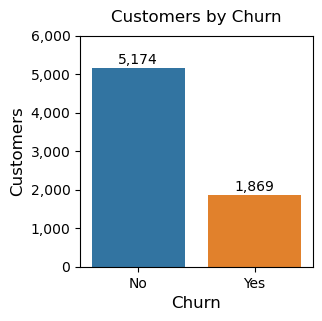

In [23]:
# A Bar Chart of counts of the target variable:
temp_df = df.copy()
temp_df['Churn'] = temp_df['Churn'].map({0: 'No', 1: 'Yes'})
fig, ax = plt.subplots(figsize=(3, 3))
# Create the count plot using seaborn
sns.countplot(data=temp_df, x='Churn', ax=ax)
# Loop through the bars to add labels with comma formatting
for bar in ax.patches:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2, 
        height + 20,  # Adjust the value to position the label higher
        f'{height:,.0f}', 
        ha='center', 
        va='bottom', 
        fontsize=10
    )
ax.set_title("Customers by Churn", fontsize=12, pad=10)
ax.set_xlabel("Churn", fontsize=12)
ax.set_ylabel("Customers", fontsize=12)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:,.0f}'))
# Set y-axis limits from 0 to 6,000 
ax.set_ylim(0, 6000)
# Display the plot
plt.show()

Checking for class imbalance in a classification machine learning project is important. Addressing class imbalance helps in building a more accurate and reliable model.
- No Churn Ratio: 5,174 ÷ 7,043 = 0.734
- Yes Churn Ratio: 1,869 ÷ 7,043 = 0.265

Since the **No Churn** class represents approximately **73%** of the data and the **Yes Churn** class represents only **27%**, there is a clear imbalance. This imbalance can affect the performance of a classification model, as it might become biased towards predicting the majority class **No Churn**.
To address this class imbalance, **Synthetic Minority Over-sampling Technique** (SMOTE) will be used.

## Model Selection and Training:

In [24]:
# To first create a copy of the original DataFrame:
dfc = df.copy()

In [25]:
# To drop a column that is not needed for the analysis:
dfc = dfc.drop('customerID', axis=1)

In [26]:
# To encode all categorical columns:
dfc_encoded = pd.get_dummies(dfc, drop_first=True)
dfc_encoded

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,0,34,56.95,1889.50,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,0,45,42.30,1840.75,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
4,0,2,70.70,151.65,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,0,1,1,1,1,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1,1,0,1,0,0,1
7039,0,72,103.20,7362.90,0,0,1,1,1,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,1,1,0,1,1,0,0
7040,0,11,29.60,346.45,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
7041,1,4,74.40,306.60,1,1,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


In [27]:
# To define the features (X) and target variable (y):
X = dfc_encoded.drop('Churn', axis=1)
y = dfc_encoded['Churn']

In [28]:
# To split the data into training and testing sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
# To apply SMOTE to the training data:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train) 

In [30]:
# To create a DataFrame to store metrics for the classification models:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Calculate confusion matrix and derive metrics
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    false_negatives = fn
    false_positives = fp
    specificity = tn / (tn + fp)
    sensitivity = tp / (tp + fn)
    
    return accuracy, precision, recall, f1, false_negatives, false_positives, specificity, sensitivity, cm

# Initialize the DataFrame to store the metrics
metrics_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 
                                   'F1-Score', 'False Negatives', 'False Positives', 
                                   'Specificity', 'Sensitivity'])

### Trying Different Classification Models:

In [31]:
# Logistic Regression:
from sklearn.linear_model import LogisticRegression
# Instantiate the Logistic Regression model
logreg = LogisticRegression(random_state=42, max_iter=2500)

# Fit the Logistic Regression model using the resampled training data
logreg.fit(X_train_smote, y_train_smote)

# Evaluate the Logistic Regression model
(logreg_accuracy, logreg_precision, logreg_recall, logreg_f1, logreg_fn, logreg_fp, 
 logreg_specificity, logreg_sensitivity, logreg_cm) = evaluate_model(logreg, X_test, y_test)

# Create a DataFrame with the metrics for the Logistic Regression model
logreg_metrics = pd.DataFrame([{
    'Model': 'Logistic Regression', 
    'Accuracy': logreg_accuracy, 
    'Precision': logreg_precision, 
    'Recall': logreg_recall, 
    'F1-Score': logreg_f1, 
    'False Negatives': logreg_fn, 
    'False Positives': logreg_fp, 
    'Specificity': logreg_specificity, 
    'Sensitivity': logreg_sensitivity
}])

# Concatenate the metrics DataFrame
metrics_df = pd.concat([metrics_df, logreg_metrics], ignore_index=True)

In [32]:
# Decision Tree Classifier:
from sklearn.tree import DecisionTreeClassifier
# Instantiate the Decision Tree model
dtree = DecisionTreeClassifier(random_state=42)

# Fit the Decision Tree model using the resampled training data
dtree.fit(X_train_smote, y_train_smote)

# Evaluate the Decision Tree model
(dtree_accuracy, dtree_precision, dtree_recall, dtree_f1, dtree_fn, dtree_fp, 
 dtree_specificity, dtree_sensitivity, dtree_cm) = evaluate_model(dtree, X_test, y_test)

# Create a DataFrame with the metrics for the Decision Tree model
dtree_metrics = pd.DataFrame([{
    'Model': 'Decision Tree', 
    'Accuracy': dtree_accuracy, 
    'Precision': dtree_precision, 
    'Recall': dtree_recall, 
    'F1-Score': dtree_f1, 
    'False Negatives': dtree_fn, 
    'False Positives': dtree_fp, 
    'Specificity': dtree_specificity, 
    'Sensitivity': dtree_sensitivity
}])

# Concatenate the metrics DataFrame
metrics_df = pd.concat([metrics_df, dtree_metrics], ignore_index=True)

In [33]:
# Random Forest Classifier:
from sklearn.ensemble import RandomForestClassifier
# Instantiate the Random Forest model
rf = RandomForestClassifier(random_state=42, n_estimators=100)

# Fit the Random Forest model using the resampled training data
rf.fit(X_train_smote, y_train_smote)

# Evaluate the Random Forest model
(rf_accuracy, rf_precision, rf_recall, rf_f1, rf_fn, rf_fp, 
 rf_specificity, rf_sensitivity, rf_cm) = evaluate_model(rf, X_test, y_test)

# Create a DataFrame with the metrics for the Random Forest model
rf_metrics = pd.DataFrame([{
    'Model': 'Random Forest', 
    'Accuracy': rf_accuracy, 
    'Precision': rf_precision, 
    'Recall': rf_recall, 
    'F1-Score': rf_f1, 
    'False Negatives': rf_fn, 
    'False Positives': rf_fp, 
    'Specificity': rf_specificity, 
    'Sensitivity': rf_sensitivity
}])

# Concatenate the metrics DataFrame
metrics_df = pd.concat([metrics_df, rf_metrics], ignore_index=True)

In [34]:
# Naive Bayes Classifier:
from sklearn.naive_bayes import GaussianNB
# Instantiate the Naive Bayes classifier
nb = GaussianNB()

# Fit the Naive Bayes model using the resampled training data
nb.fit(X_train_smote, y_train_smote)

# Evaluate the Naive Bayes model
(nb_accuracy, nb_precision, nb_recall, nb_f1, nb_fn, nb_fp, 
 nb_specificity, nb_sensitivity, nb_cm) = evaluate_model(nb, X_test, y_test)

# Create a DataFrame with the metrics for the Naive Bayes model
nb_metrics = pd.DataFrame([{
    'Model': 'Naive Bayes', 
    'Accuracy': nb_accuracy, 
    'Precision': nb_precision, 
    'Recall': nb_recall, 
    'F1-Score': nb_f1, 
    'False Negatives': nb_fn, 
    'False Positives': nb_fp, 
    'Specificity': nb_specificity, 
    'Sensitivity': nb_sensitivity
}])

# Concatenate the metrics DataFrame
metrics_df = pd.concat([metrics_df, nb_metrics], ignore_index=True)

In [35]:
# AdaBoost Classifier:
from sklearn.ensemble import AdaBoostClassifier
# Instantiate the AdaBoost classifier
ada = AdaBoostClassifier(random_state=42, n_estimators=100)

# Fit the AdaBoost model using the resampled training data
ada.fit(X_train_smote, y_train_smote)

# Evaluate the AdaBoost model
(ada_accuracy, ada_precision, ada_recall, ada_f1, ada_fn, ada_fp, 
 ada_specificity, ada_sensitivity, ada_cm) = evaluate_model(ada, X_test, y_test)

# Create a DataFrame with the metrics for the AdaBoost model
ada_metrics = pd.DataFrame([{
    'Model': 'AdaBoost', 
    'Accuracy': ada_accuracy, 
    'Precision': ada_precision, 
    'Recall': ada_recall, 
    'F1-Score': ada_f1, 
    'False Negatives': ada_fn, 
    'False Positives': ada_fp, 
    'Specificity': ada_specificity, 
    'Sensitivity': ada_sensitivity
}])

# Concatenate the metrics DataFrame
metrics_df = pd.concat([metrics_df, ada_metrics], ignore_index=True)

In [36]:
# XGBoost Classifier:
from xgboost import XGBClassifier
# Instantiate the XGBoost classifier
xgb = XGBClassifier(random_state=42, n_estimators=100)

# Fit the XGBoost model using the resampled training data
xgb.fit(X_train_smote, y_train_smote)

# Evaluate the XGBoost model
(xgb_accuracy, xgb_precision, xgb_recall, xgb_f1, xgb_fn, xgb_fp, 
 xgb_specificity, xgb_sensitivity, xgb_cm) = evaluate_model(xgb, X_test, y_test)

# Create a DataFrame with the metrics for the XGBoost model
xgb_metrics = pd.DataFrame([{
    'Model': 'XGBoost', 
    'Accuracy': xgb_accuracy, 
    'Precision': xgb_precision, 
    'Recall': xgb_recall, 
    'F1-Score': xgb_f1, 
    'False Negatives': xgb_fn, 
    'False Positives': xgb_fp, 
    'Specificity': xgb_specificity, 
    'Sensitivity': xgb_sensitivity
}])

# Concatenate the metrics DataFrame
metrics_df = pd.concat([metrics_df, xgb_metrics], ignore_index=True)

In [37]:
# Tuned XGBoost Classifier:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Instantiate the XGBoost classifier
xgb_tuned = xgb.XGBClassifier(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.01, 0.1, 1, 10],
    'max_depth': [3, 5, 7, 9]
}

# Perform the grid search using the resampled training data
grid_search = GridSearchCV(xgb_tuned, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_smote, y_train_smote)

# Get the best estimator
xgb_tuned = grid_search.best_estimator_

# Fit the best model using the resampled training data
xgb_tuned.fit(X_train_smote, y_train_smote)

# Evaluate the best model
(xgb_accuracy_tuned, xgb_precision_tuned, xgb_recall_tuned, xgb_f1_tuned, xgb_fn_tuned, xgb_fp_tuned, 
 xgb_specificity_tuned, xgb_sensitivity_tuned, xgb_cm_tuned) = evaluate_model(xgb_tuned, X_test, y_test)

# Create a DataFrame with the metrics for the tuned XGBoost model
xgb_metrics_tuned = pd.DataFrame([{
    'Model': 'XGBoost_tuned', 
    'Accuracy': xgb_accuracy_tuned, 
    'Precision': xgb_precision_tuned, 
    'Recall': xgb_recall_tuned, 
    'F1-Score': xgb_f1_tuned, 
    'False Negatives': xgb_fn_tuned, 
    'False Positives': xgb_fp_tuned, 
    'Specificity': xgb_specificity_tuned, 
    'Sensitivity': xgb_sensitivity_tuned
}])

# Concatenate the metrics DataFrame
metrics_df = pd.concat([metrics_df, xgb_metrics_tuned], ignore_index=True)

# Output the best parameters
print("Best parameters found by GridSearchCV:")
print(grid_search.best_params_)

Best parameters found by GridSearchCV:
{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}


## Model Evaluation:

In [38]:
# To print the metrics DataFrame:
metrics_df

,Model,Accuracy,Precision,Recall,F1-Score,False Negatives,False Positives,Specificity,Sensitivity
0,Logistic Regression,0.784244,0.574837,0.710456,0.635492,108,196,0.810811,0.710456
1,Decision Tree,0.726047,0.486022,0.605898,0.539379,147,239,0.769305,0.605898
2,Random Forest,0.784244,0.592992,0.589812,0.591398,153,151,0.854247,0.589812
3,Naive Bayes,0.718240,0.481538,0.839142,0.611926,60,337,0.674710,0.839142
4,AdaBoost,0.774308,0.554455,0.750670,0.637813,93,225,0.782819,0.750670
5,XGBoost,0.773598,0.573770,0.563003,0.568336,163,156,0.849421,0.563003
6,XGBoost_tuned,0.785664,0.592689,0.608579,0.600529,146,156,0.849421,0.608579


In this classification machine learning project, a false positive and a false negative are two types of prediction errors that can occur.
- A false positive (Type I Error) is when the model incorrectly predicts that a customer will churn when, in reality, they will stay.
- A false negative (Type II Error) happens when the model incorrectly predicts that a customer will stay when, in fact, they will churn.

In the context of churn prediction, a false negative can be considered more costly than a false positive.  With a false negative, the company misses the opportunity to take proactive measures to retain the customer. This can result in lost revenue and potentially long-term negative effects on customer loyalty and brand reputation.  False negatives mean that the company misses out on the opportunity to engage with the customer and address any issues they may have, which could have been resolved to prevent churn.

In [39]:
# To sort the metrics DataFrame by Recall in descending order:
metrics_df = metrics_df.sort_values(by='Recall', ascending=False)
# Print the sorted DataFrame with all metrics
metrics_df

,Model,Accuracy,Precision,Recall,F1-Score,False Negatives,False Positives,Specificity,Sensitivity
3,Naive Bayes,0.718240,0.481538,0.839142,0.611926,60,337,0.674710,0.839142
4,AdaBoost,0.774308,0.554455,0.750670,0.637813,93,225,0.782819,0.750670
0,Logistic Regression,0.784244,0.574837,0.710456,0.635492,108,196,0.810811,0.710456
6,XGBoost_tuned,0.785664,0.592689,0.608579,0.600529,146,156,0.849421,0.608579
1,Decision Tree,0.726047,0.486022,0.605898,0.539379,147,239,0.769305,0.605898
2,Random Forest,0.784244,0.592992,0.589812,0.591398,153,151,0.854247,0.589812
5,XGBoost,0.773598,0.573770,0.563003,0.568336,163,156,0.849421,0.563003


- Higher Precision indicates that a model has fewer false positives.
- Higher Recall means that the model has fewer false negatives.
- For this use case the most important metric to prioritize is Recall, because the cost of missing a potential churn (false negative) is typically higher than the cost of incorrectly predicting a churn (false positive).

## Final Model and Predictions:

The model that had the highest Recall value was the Naive Bayes classifier, and it will be used to make customer churn predictions.

**Accuracy (71.82%)** = This means that the model correctly predicts whether a customer will churn or not about 72% of the time.

**Precision (48.15%)** = This means that when the model predicts a customer will churn, it is correct about 48% of the time, indicating that there are quite a few false positives (customers predicted to churn who actually don't).

**Recall (83.91%)** = This means that the model captures about 84% of actual churners, indicating that it is effective at identifying most customers who are at risk of churning. **High recall is important for churn prediction, as missing out on true churners could result in losing valuable customers.**

**F1 Score (61.19%)** = The F1 score considers both false positives and false negatives. With an F1 score of approximately 61%, the model shows a balance between identifying churners and minimizing false alarms.

In [40]:
# To create new data to be used in the model for predictions:
new_data = {
    'SeniorCitizen': [1, 0],
    'tenure': [100, 10],
    'MonthlyCharges': [30.0, 100.0],
    'TotalCharges': [80.0, 30.0],
    'gender': ['Female', 'Male'],
    'Partner': ['No', 'No'],
    'Dependents': ['No', 'No'],
    'PhoneService': ['Yes', 'Yes'],
    'MultipleLines': ['No phone service', 'No phone service'],
    'InternetService': ['DSL', 'Fiber optic'],
    'OnlineSecurity': ['Yes', 'No'],
    'OnlineBackup': ['No', 'No'],
    'DeviceProtection': ['Yes', 'No'],
    'TechSupport': ['Yes', 'No'],
    'StreamingTV': ['No', 'No'],
    'StreamingMovies': ['Yes', 'No'],
    'Contract': ['Month-to-month', 'Month-to-month'],
    'PaperlessBilling': ['Yes', 'Yes'],
    'PaymentMethod': ['Electronic check', 'Electronic check']
}
new_df = pd.DataFrame(new_data)

In [41]:
# To encode all categorical columns:
new_df_encoded = pd.get_dummies(new_df)

In [42]:
# To ensure the new_df_encoded DataFrame has the same columns as the original encoded DataFrame:
encoded_columns = X.columns
new_df_encoded = new_df_encoded.reindex(columns=encoded_columns, fill_value=0)

In [43]:
# To view the first two rows of the resampled training data:
X_train_smote.head(2)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,21,64.85,1336.80,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1
1,0,54,97.20,5129.45,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,1,0,0,0


In [44]:
# To verify that the new_df_encoded columns match the X_train_smote columns:
new_df_encoded.head(2)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,100,30.0,80.0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0
1,0,10,100.0,30.0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


In [45]:
# To predict using the selected trained model:
new_prediction = nb.predict(new_df_encoded)

In [46]:
# To show the predicted values as a DataFrame:
predictions = new_df.copy()
predictions['Predicted to Churn'] = new_prediction
# Map the predicted values 0 to No and 1 to Yes
predictions['Predicted to Churn'] = predictions['Predicted to Churn'].map({0: 'No', 1: 'Yes'})
# Show the predictions DataFrame
predictions

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Predicted to Churn
0,1,100,30.0,80.0,Female,No,No,Yes,No phone service,DSL,Yes,No,Yes,Yes,No,Yes,Month-to-month,Yes,Electronic check,No
1,0,10,100.0,30.0,Male,No,No,Yes,No phone service,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


## Key Takeaways:

- Customers with month-to-month contracts have a significantly higher churn rate compared to those with one-year or two-year contracts. This indicates that customers on shorter-term contracts are more likely to leave.<br><br>
- Customers with higher monthly charges tend to have a higher churn rate. This suggests that cost sensitivity is a significant factor in customer retention, and customers may be seeking more affordable alternatives.<br><br>
- Customers with longer tenure are less likely to churn. This indicates that once customers are engaged and satisfied over a longer period, they tend to remain loyal to the company.

## Recommendations:

- The company can consider encouraging customers to switch from month-to-month contracts to one-year or two-year contracts by offering incentives such as discounts, additional benefits, or loyalty rewards. This can help reduce churn rates and increase customer retention.<br><br>
- Another consideration can be implementing strategies to address cost sensitivity among customers with higher monthly charges. This could include offering tiered pricing plans, bundling services at a discounted rate, or providing personalized offers based on customer usage patterns.<br><br>
- Focusing on improving the onboarding experience and providing exceptional support during the initial months of a customer's tenure can help build strong relationships early on and reduce the likelihood of churn.<br><br>